<h2>Assigment Python 1<h2>

Nama         : Clarissa Sanindita Reikisyifa

Kode Peserta : PYTN-KS17-03

## Load Data & Dependancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
from wordcloud import WordCloud, STOPWORDS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/london_crime_by_lsoa.csv')

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [7]:
df.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [8]:
nilai_unik = df['major_category'].unique()
print(nilai_unik)


['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [9]:
nilai_unik = df['borough'].unique()
print(nilai_unik)


['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [10]:
nilai_unik = df['year'].unique()
nilai_unik.sort()
print(nilai_unik)


[2008 2009 2010 2011 2012 2013 2014 2015 2016]


## Preprosesing Data

Tidak dilakukan preprosesing karena data sudah baik

In [11]:
nilai_null = df.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Nilai Duplikat: 0


In [12]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Area Plot

Bagaimana perkembangan jumlah kejahatan dalam kategori utama selama 5 tahun terakhir?

Pada grafik menunjukkan bahwa tingkat kejahatan pada tahun 2012 terbilang tinggi terutama pada jenis kejahatan pencurian. Namun, semakin berjalannya waktu tingkat kejahatan menurun. Tapi pada waktu bersamaan jenis kejahatan kekerasan terhadap orang memiliki kenaikan yang signifikan.

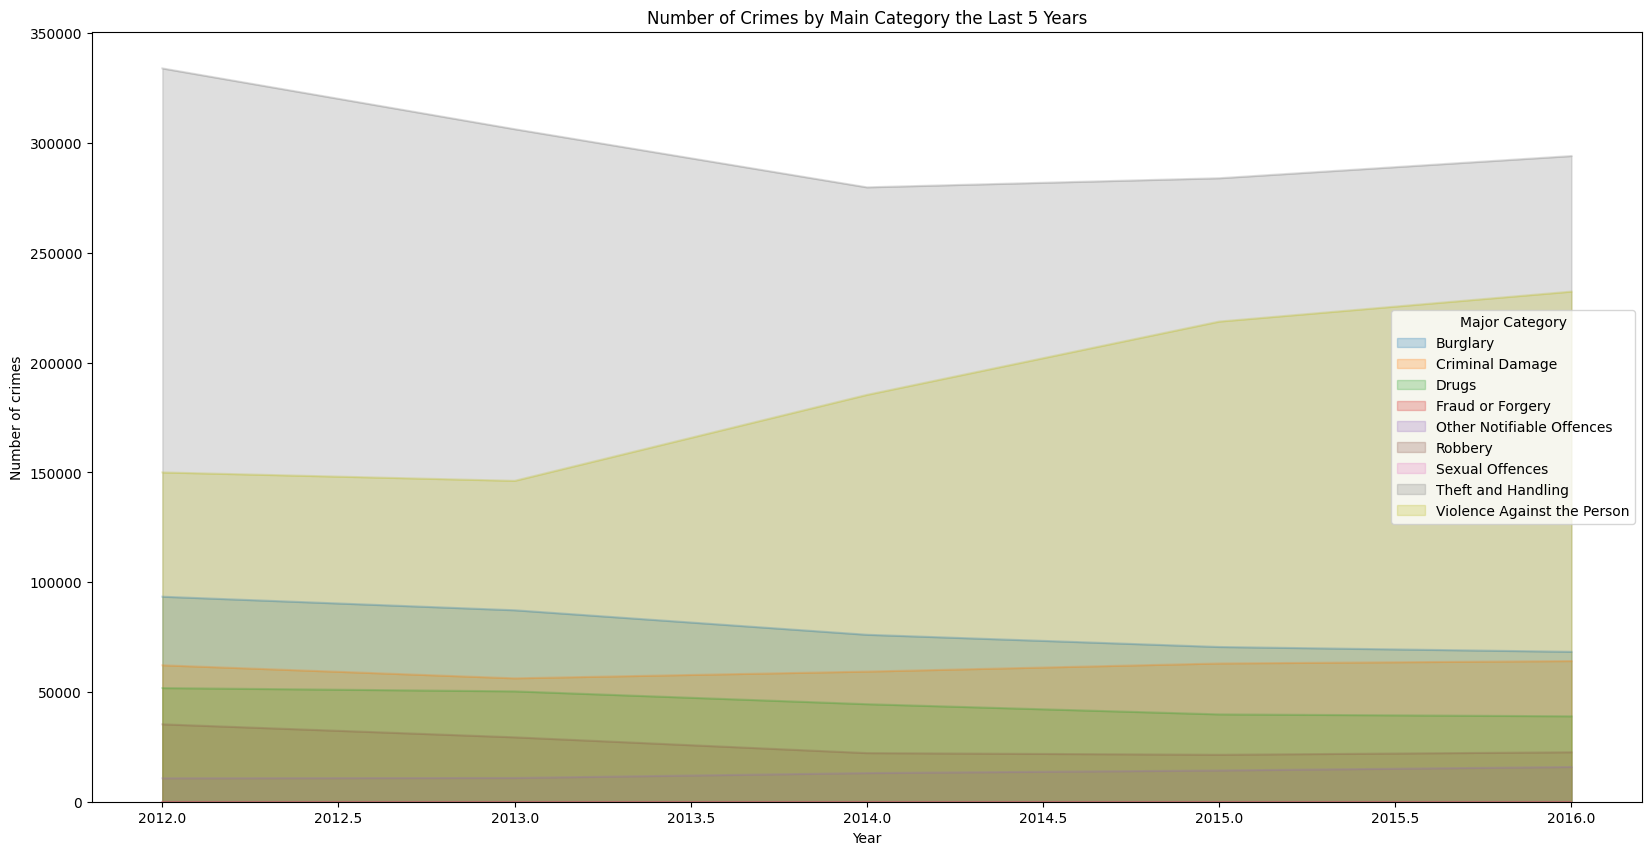

In [13]:
filtered_data = df[df['year'] >= 2012]
group_df = filtered_data.groupby(['year', 'major_category'])['value'].sum().unstack()
group_df.plot(kind='area',alpha = 0.25, stacked=False, figsize=(20, 10))

plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of Crimes by Main Category the Last 5 Years')
plt.legend(title='Major Category')
plt.show()

## Histrogam

Bagaimana tingkat kejahatan dalam setiap kategori utama pada tiap tahun?

Tingkat kejahatan pada kategori pencurian memiliki jumlah terbanyak dibandingkan dengan kejahatan lain jika dilihat dari warna bae di bawah

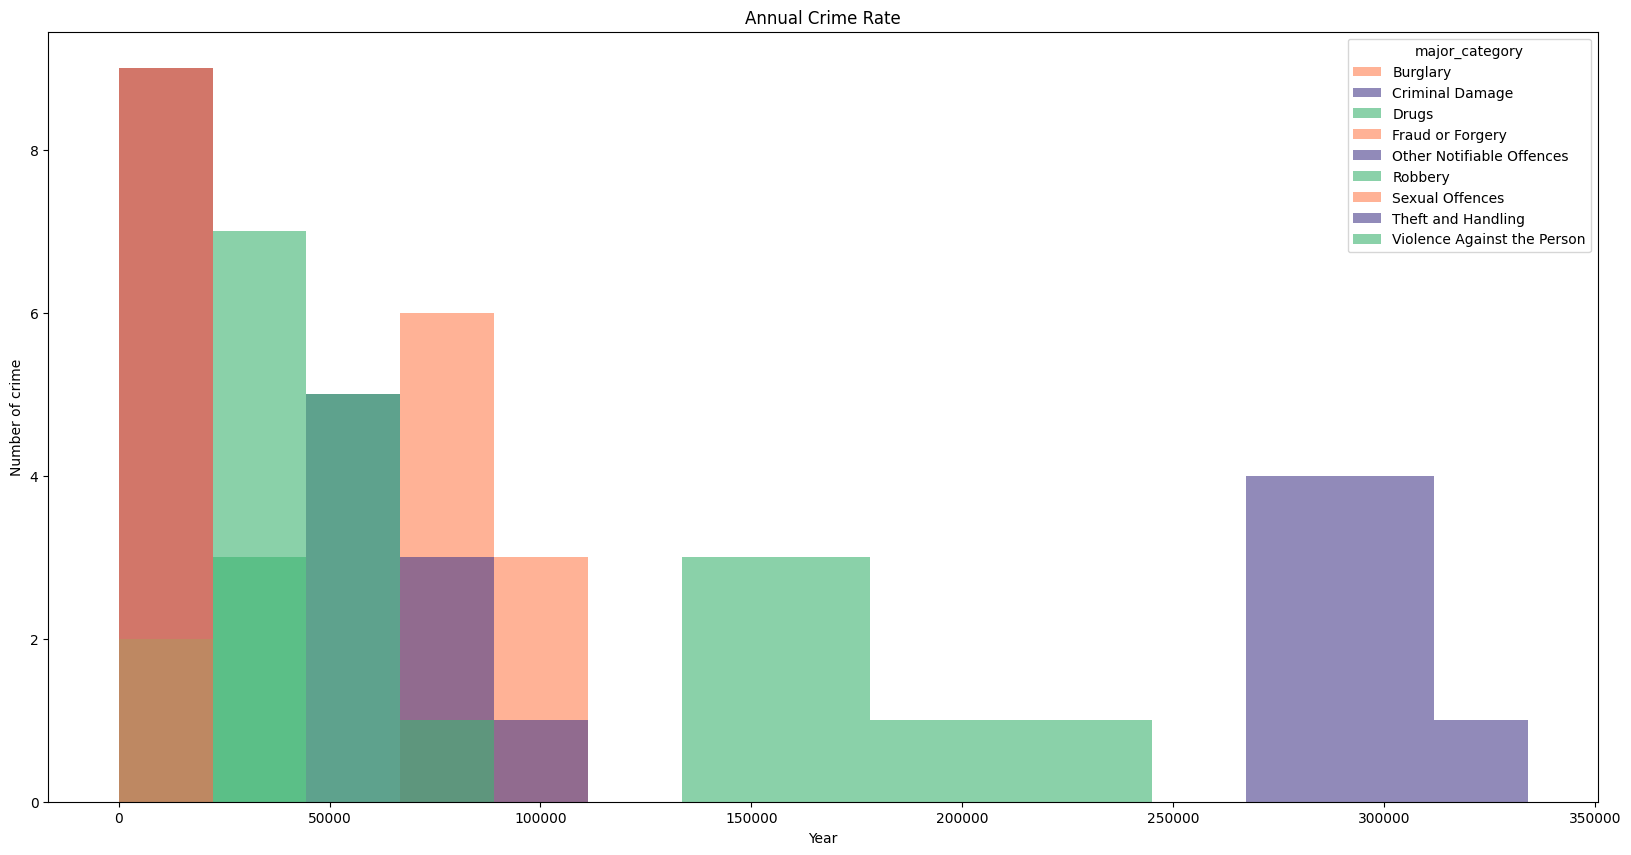

In [14]:
group_df = df.groupby(['year', 'major_category'])['value'].sum().unstack()
group_df.plot(kind='hist',
         figsize=(20,10),
         bins=15,
         alpha=0.6,
         color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.title('Annual Crime Rate')
plt.show()

## Bar Chart

Bulan apa yang memiliki total kejahatan tertinggi?

Hasil dari Bar Chart menunjukkan bahwa bulan Maret memiliki jumlah kejahatan terbanyak dibanding yang bulan lain. Disusul dengan bulan Januari kemudian Juli.

In [15]:
month_df = df.groupby(['year', 'month'])['value'].sum().reset_index()
bulan_map = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
month_df['month'] = month_df['month'].map(bulan_map)

print(month_df)

     year      month  value
0    2008    Januari  65419
1    2008   Februari  62626
2    2008      Maret  61343
3    2008      April  59640
4    2008        Mei  62587
..    ...        ...    ...
103  2016    Agustus  62666
104  2016  September  61412
105  2016    Oktober  63405
106  2016   November  61064
107  2016   Desember  62455

[108 rows x 3 columns]


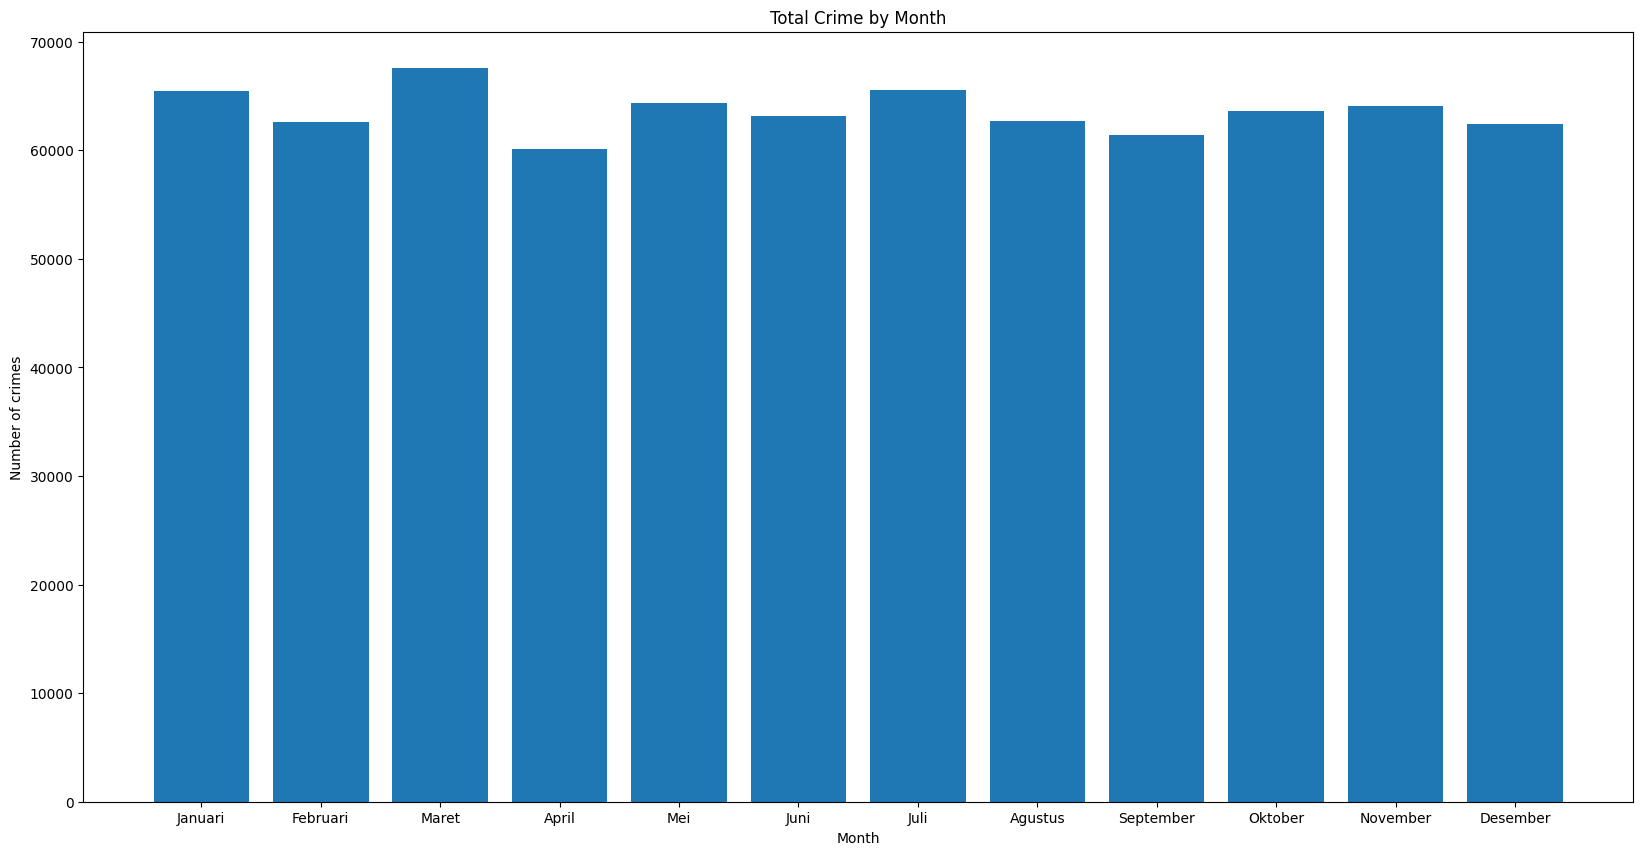

In [16]:
plt.figure(figsize=(20, 10))
plt.bar(month_df['month'].astype(str), month_df['value'])
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Total Crime by Month')
plt.show()


Bagaimana tingkat kejahatan pencurian di Croydon pada tahun 2016 dibandingkan dengan tahun 2008?

Tingkat kejahatan pencurian di Croydon stabil jika dibandingkan antara tahun 2008 dan 2016. Namun, secara tiba tiba tingkat kejahatan ditahun 2011 mengalami peningkatan hingga menyentuh angka 29.

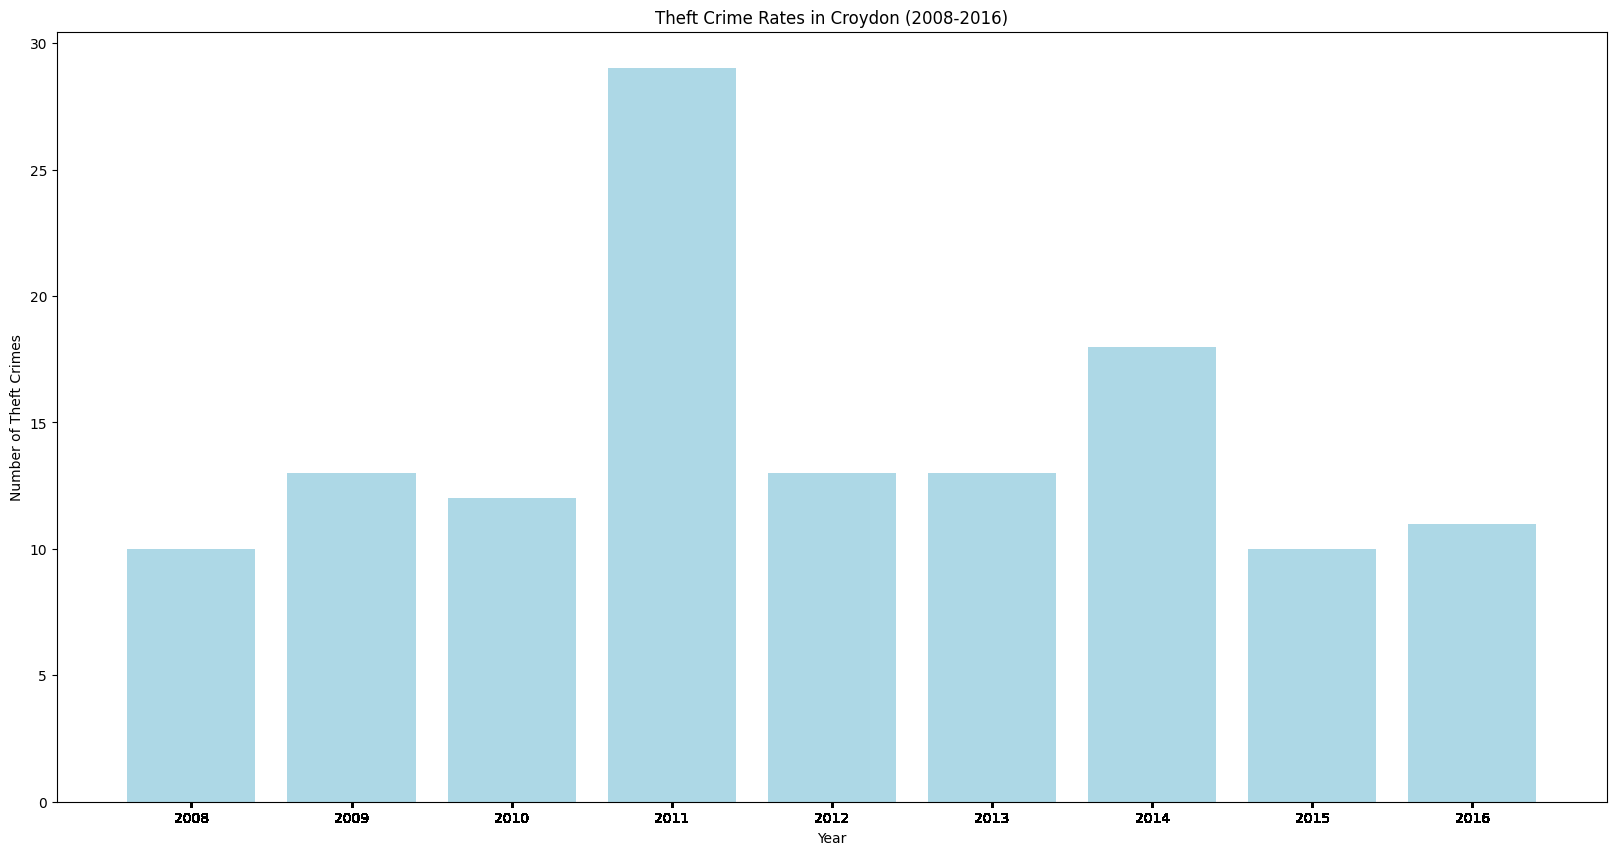

In [17]:
burglary_croydon = df[(df['borough'] == 'Croydon') & (df['major_category'] == 'Burglary')]

plt.figure(figsize=(20, 10))
plt.bar(burglary_croydon['year'], burglary_croydon['value'], color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Theft Crimes')
plt.title('Theft Crime Rates in Croydon (2008-2016)')
plt.xticks(burglary_croydon['year'])
plt.show()

Di mana kejahatan terbesar di kota London?

Kejahatan terbesar di kota London biasanya terjadi di beberapa borough yang memiliki populasi tinggi dan pusat-pusat kegiatan ekonomi dan sosial yang padat. Tiga borough yang dikenal memiliki tingkat kejahatan yang cukup tinggi, termasuk Westminster, Lambeth, dan Southwark.

In [18]:
borough_crime_counts = df.groupby('borough')['value'].sum().reset_index()
sorted_boroughs = borough_crime_counts.sort_values(by='value', ascending=False)

kota_terbanyak_kejahatan = sorted_boroughs.iloc[0]['borough']
jumlah_kejahatan_terbanyak = sorted_boroughs.iloc[0]['value']

print(f"Kota dengan jumlah kejahatan terbanyak adalah {kota_terbanyak_kejahatan} dengan total {jumlah_kejahatan_terbanyak} kejahatan.")


Kota dengan jumlah kejahatan terbanyak adalah Westminster dengan total 455028 kejahatan.


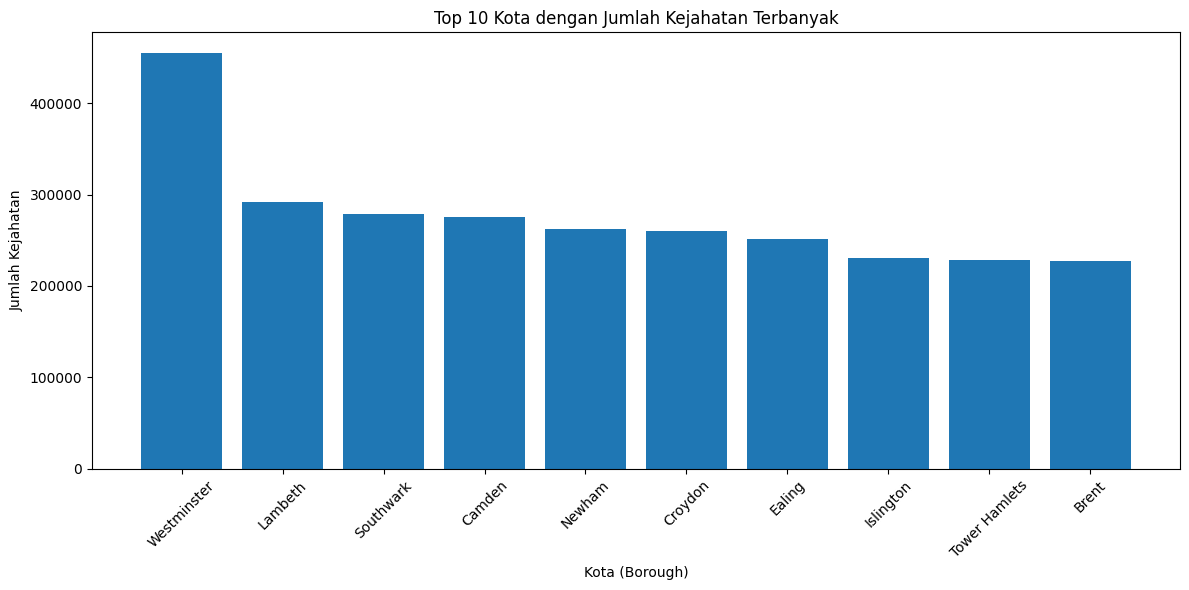

In [19]:
top_10_boroughs = sorted_boroughs.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_boroughs['borough'], top_10_boroughs['value'])
plt.xlabel('Kota (Borough)')
plt.ylabel('Jumlah Kejahatan')
plt.title('Top 10 Kota dengan Jumlah Kejahatan Terbanyak')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pie Chart

Bagaimana perbandingan tingkat kejahatan antara kategori utama?

Perbandingan yang dapat dilihat dimana hampir setengah dari seluruhnya adalah milik pencurian sebesar 41.3%. Dan kejahatan paling kecil didapat oleh perampokan sebesar 6%

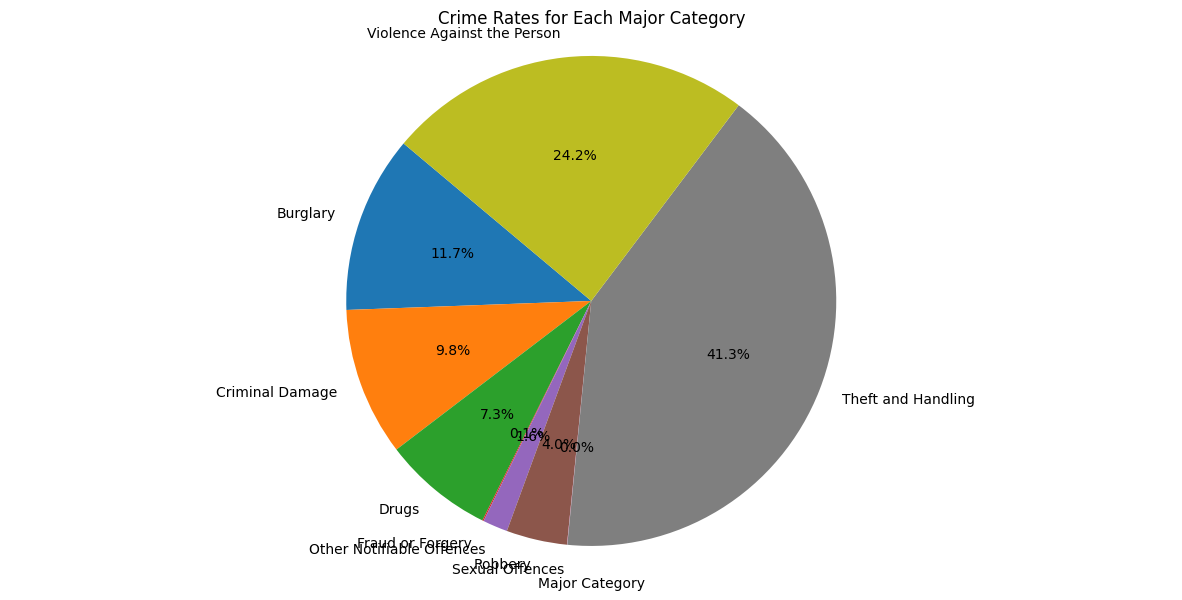

In [20]:
grouped_data = df.groupby('major_category')['value'].sum().reset_index()

plt.figure(figsize=(15, 7))
plt.pie(grouped_data['value'], labels=grouped_data['major_category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.xlabel('Major Category')
plt.title('Crime Rates for Each Major Category')
plt.show()

## Box Plot

Bagaimana distribusi data jumlah kejahatan di Westminster selama periode 2008-2016?

Boxplot yang dibuat untuk jumlah kejahatan di Westminster dari tahun 2008 hingga 2016 digunakan untuk memvisualisasikan distribusi data tingkat kejahatan selama periode tersebut. Boxplot ini memberikan informasi tentang nilai tengah (median), kuartil bawah (Q1), kuartil atas (Q3), serta deteksi outlier jika ada.

In [21]:
westminster_data = df[df['borough'] == 'Westminster']
westminster_data = westminster_data.groupby('year')['value'].sum().reset_index()
westminster_data = westminster_data.rename(columns={'value': 'Westminster'})

print(westminster_data)

   year  Westminster
0  2008        47846
1  2009        48456
2  2010        48116
3  2011        54243
4  2012        59226
5  2013        53852
6  2014        47564
7  2015        47395
8  2016        48330


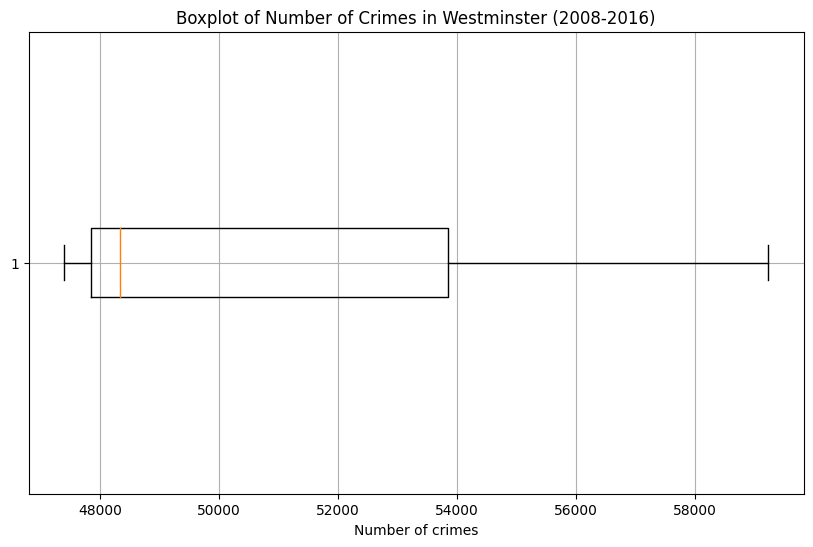

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot(westminster_data['Westminster'], vert=False)
plt.xlabel('Number of crimes')
plt.title('Boxplot of Number of Crimes in Westminster (2008-2016)')
plt.grid(True)
plt.show()

## Scatter Plot

Bagaimana distribusi jumlah kejahatan di Lambeth dari tahun 2008 hingga 2016 terlihat dalam plot?

Scatter plot Number of Crimes in Lambeth (2008-2016) menggambarkan pola persebaran data jumlah kejahatan di borough Lambeth selama periode tersebut. Dalam scatter plot ini, titik-titik merepresentasikan jumlah kejahatan untuk setiap tahun. Dapat dilihat nilai tertinggi ada pada tahun 2016.

In [23]:
lambeth_data = df[df['borough'] == 'Lambeth']
lambeth_data = lambeth_data.groupby('year')['value'].sum().reset_index()
lambeth_data = lambeth_data.rename(columns={'value': 'Lembeth'})

print(lambeth_data)

   year  Lembeth
0  2008    31717
1  2009    31225
2  2010    31671
3  2011    33224
4  2012    33473
5  2013    31868
6  2014    31765
7  2015    33164
8  2016    34071


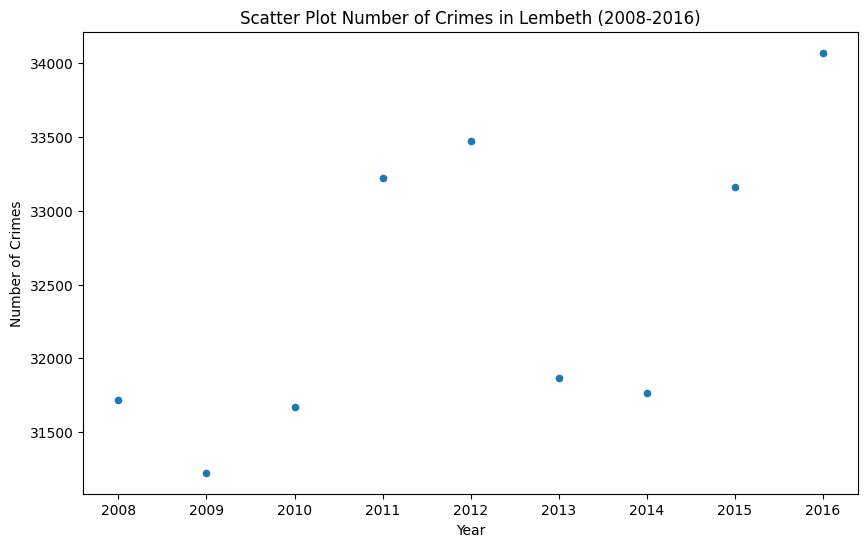

In [24]:
lambeth_data.plot(kind='scatter', x='year', y='Lembeth', figsize=(10,6))

plt.title('Scatter Plot Number of Crimes in Lembeth (2008-2016)')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')

plt.show()

## Word Clouds

Apa kategori utama kejahatan yang paling dominan atau sering muncul dalam Word Clouds tersebut?

Dalam Word Clouds, ukuran kata-kata mencerminkan sejauh mana kategori-kategori tersebut muncul dalam data. Kategori utama kejahatan yang lebih sering muncul akan memiliki ukuran kata yang lebih besar. Dapat dilihat bahwa Criminal Damage dan Handling Theft menunjukkan ukuran yang lebih besar.

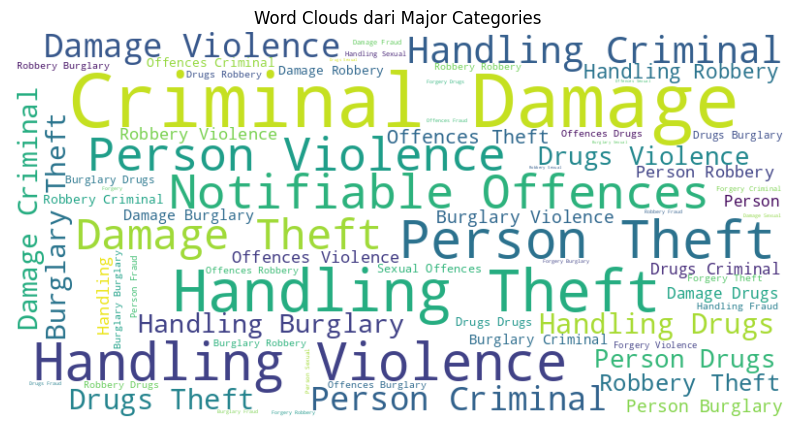

In [25]:
text = ' '.join(df['major_category'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Clouds dari Major Categories')
plt.show()

Apa kategori minor kejahatan yang paling dominan atau sering muncul dalam Word Clouds tersebut?

Dalam Word Clouds, ukuran kata-kata mencerminkan sejauh mana kategori-kategori tersebut muncul dalam data. Kategori minor kejahatan yang lebih sering muncul akan memiliki ukuran kata yang lebih besar. Dapat dilihat bahwa Criminal Damage dan Motor Vehicle menunjukkan ukuran yang lebih besar.

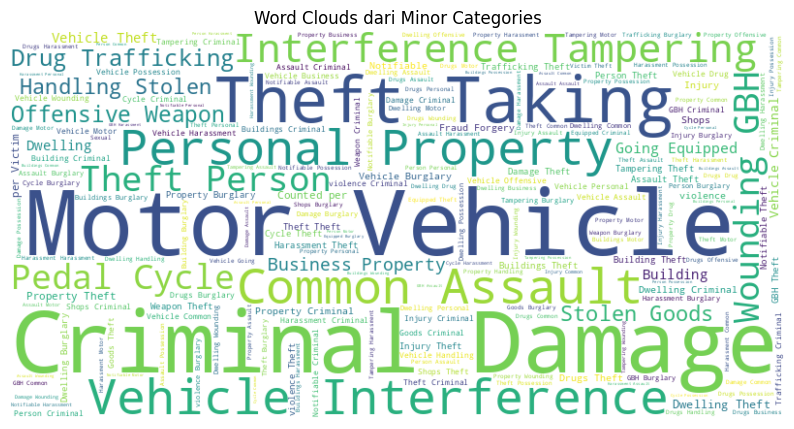

In [26]:
text = ' '.join(df['minor_category'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Clouds dari Minor Categories')
plt.show()